### mm. yea. explore that data.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [42]:
#steam data set
data = pd.read_csv("Data\games-features.csv")

In [59]:
#exclude dupicate games
data = data.drop_duplicates() 
#keep games only
data = data[data.GenreIsNonGame == False]
#remove duplicates
data = data.drop_duplicates(subset ="ResponseName", 
                     keep = 'first',) 

In [60]:
import re
from collections import OrderedDict
#pattern used for detecting year
pattern = re.compile("\d{4}$")

def year_distrib( gamelist):
    year_distrib = {}
    for index, row in gamelist.iterrows():
        match = pattern.search(row['ReleaseDate'])
        if match:
            year = int(match.group(0))
            if year not in year_distrib:
                year_distrib[year]=0
            year_distrib[year] = year_distrib[year]+1    
    return year_distrib

#divide game by payment type
free_games = data[data.IsFree == True]
paid_games = data[data.PurchaseAvail == True]
sub_games = data[data.SubscriptionAvail == True]

free = year_distrib(free_games)
paid = year_distrib(paid_games)
sub = year_distrib(sub_games)

print("free Games by year:  " + str(sorted(free.items())))
print("total number of free games: "+ str( sum(free.values())))
print()
print("Paid Games:  " + str(sorted(paid.items())))
print("total number of paid games: "+ str( sum(paid.values())))
print()
print("Subscription Games:  " + str(sorted(sub.items())))

free Games by year:  [(2001, 2), (2003, 1), (2004, 1), (2005, 2), (2006, 4), (2007, 5), (2008, 7), (2009, 9), (2010, 5), (2011, 17), (2012, 33), (2013, 39), (2014, 97), (2015, 212), (2016, 510), (2017, 9)]
total number of free games: 953

Paid Games:  [(1997, 1), (1998, 1), (1999, 2), (2000, 2), (2001, 4), (2003, 3), (2004, 6), (2005, 5), (2006, 63), (2007, 105), (2008, 171), (2009, 331), (2010, 294), (2011, 275), (2012, 355), (2013, 483), (2014, 1590), (2015, 2685), (2016, 4006), (2017, 5)]
total number of paid games: 10387

Subscription Games:  [(2010, 1), (2015, 3), (2016, 7)]


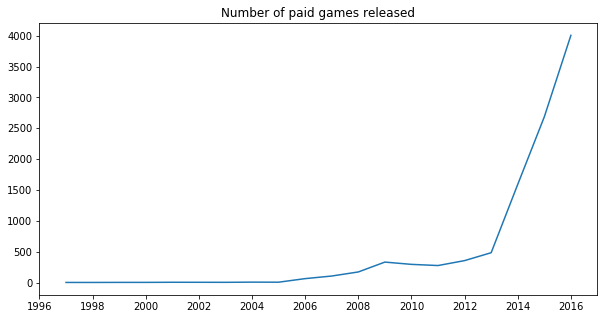

In [61]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as animation
import seaborn as sns

paid_dist = sorted(paid.items())
plt.figure(figsize=(10,5))
plt.xlim(1996,2017)
plt.xticks(np.arange(1996, 2017, step=2))
plt.plot([i[0]for i in paid_dist][:-1], [i[1]for i in paid_dist][:-1])
plt.title("Number of paid games released")
plt.show()

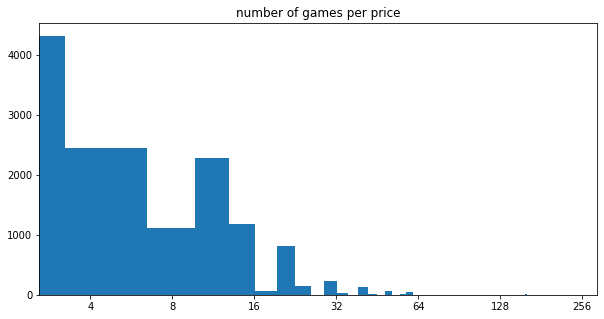

In [62]:
#price distrib

def price_distrib( gamelist):
    price_distrib = {}
    for index, row in gamelist.iterrows():
        price = float(row['PriceInitial'])
        if price not in price_distrib:
            price_distrib[price]=0
        price_distrib[price] = price_distrib[price]+1    
    return price_distrib


prices = price_distrib(data)
prices = sorted(prices.items())
price = [i[0]for i in prices]
count = [i[1] for i in prices]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

#plt.plot(price, count)
plt.hist(price,weights=count, bins = len(price))
plt.xscale("log")
plt.title("number of games per price")
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base =2, subs=(2,)))
ax.xaxis.set_minor_locator(mpl.ticker.LogLocator(base =2,subs=(2,)))
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.show()

In [63]:
# avegrage game price
avg_price = 0
total = 0
list_prices = []
for i, p in enumerate(price):
    avg_price += p*count[i]
    total += count[i]
    for c in range(count[i]):
        list_prices.append(p)
print("total price: "+ str(avg_price))
print("total games: "+ str(total))
print("average price per game: "+ str(avg_price/total) +" $")
#print(prices)
list_prices= np.array(list_prices)
print("median game price: "+ str(np.median(list_prices))+" $")

total price: 107669.63000000003
total games: 12881
average price per game: 8.358794348264889 $
median game price: 5.99 $


In [64]:

# avegrage game price\
def price_distrib_paid( gamelist):
    price_distrib = {}
    for index, row in gamelist.iterrows():
        price = float(row['PriceInitial'])
        if price != 0.0:
            if price not in price_distrib:
                price_distrib[price]=0
            price_distrib[price] = price_distrib[price]+1    
    return price_distrib

prices_paid_games = sorted(price_distrib_paid(paid_games).items())
price_paid = [i[0]for i in prices_paid_games]
count_paid = [i[1] for i in prices_paid_games]

avg_price = 0
total = 0
list_prices = []
for i, p in enumerate(price_paid):
    avg_price += p*count[i]
    total += count[i]
    for c in range(count[i]):
        list_prices.append(p)

print("total price: "+ str(avg_price))
print("total paid games: "+ str(total))
print("average price per paid game: "+ str(avg_price/total) +" $")
#print(prices)
list_prices= np.array(list_prices)
print("median paid game price: "+ str(np.median(list_prices))+" $")

total price: 113015.69000000006
total paid games: 12880
average price per paid game: 8.774510093167706 $
median paid game price: 6.49 $


{0.0: 262987, 0.5: 21343, 0.9: 1077, 0.99: 44363, 1.0: 0, 1.2: 10044, 1.49: 7712, 1.5: 897, 1.87: 60441, 1.95: 0, 1.98: 4842, 1.99: 27141, 2.0: 5022, 2.49: 230703, 2.89: 1614, 2.99: 33704, 3.0: 13631, 3.49: 187241, 3.99: 29667, 4.49: 26364, 4.99: 85751, 5.0: 0, 5.65: 3946, 5.75: 717, 5.99: 51018, 6.49: 109942, 6.99: 60222, 7.49: 195760, 7.99: 85591, 8.98: 22598, 8.99: 56554, 9.69: 23495, 9.99: 159890, 10.0: 12016, 10.99: 10555, 11.99: 40408, 12.0: 3946, 12.89: 264182, 12.99: 65189, 13.37: 224366, 13.99: 28724, 14.95: 482988, 14.99: 220575, 15.0: 267709, 15.99: 49172, 16.49: 533, 16.99: 25328, 17.99: 76335, 18.99: 57868, 19.69: 897, 19.99: 428719, 20.0: 666463, 20.99: 181860, 21.99: 167807, 22.99: 3293576, 23.99: 369101, 24.99: 248001, 25.0: 2332, 29.99: 410142, 31.99: 26723, 32.99: 231899, 34.99: 157158, 39.99: 351988, 44.99: 425858, 49.99: 134437, 54.99: 25826, 59.99: 717729, 64.99: 897, 79.99: 6336, 99.99: 474320, 149.99: 0, 159.99: 346842, 234.99: 0}


{0.0: 174372, 0.5: 8071, 0.9: 

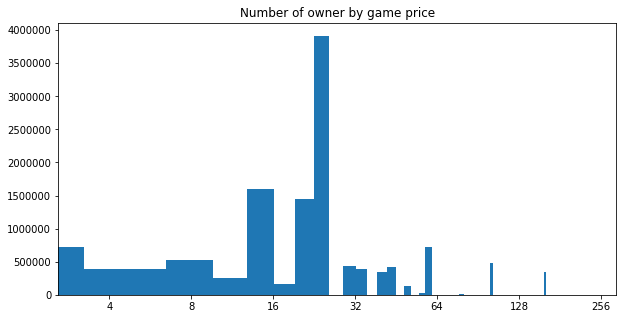

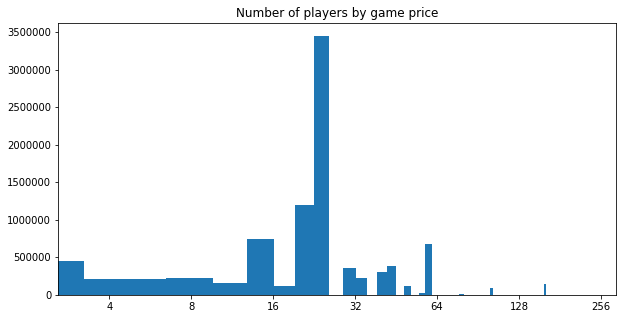

In [65]:


##calculate average owners and avergae players for each price
price_owners = {}
price_players = {}
for p in price:
    #get list of games with price p
    g = data[data.PriceInitial == p]
    nb_games = g.shape[0]
    #calculate avergae owners number
    total_owners = g["SteamSpyOwners"].sum()
    price_owners[p] = int(round(total_owners/nb_games))
    #caluculate avergae player base
    total_players = g["SteamSpyPlayersEstimate"].sum()
    price_players[p] = int(round(total_players/nb_games))

print(price_owners)
print()
print()
print(price_players)

#plt.plot( list(price_owners.keys()), list(price_owners.values()))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
plt.hist( list(price_owners.keys()) ,weights= list(price_owners.values()), bins = len( list(price_owners.keys() ) )    )
plt.xscale("log")
plt.title("Number of owner by game price")
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base =2, subs=(2,)))
ax.xaxis.set_minor_locator(mpl.ticker.LogLocator(base =2,subs=(2,)))
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.show()

#24-25$ os a good price for game! unless you are a huge big company

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
plt.hist( list(price_players.keys()) ,weights= list(price_players.values()), bins = len( list(price_players.keys() ) )    )
plt.xscale("log")
plt.title("Number of players by game price")
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base =2, subs=(2,)))
ax.xaxis.set_minor_locator(mpl.ticker.LogLocator(base =2,subs=(2,)))
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.show()

In [66]:
import scipy
#use covariance here for the prices?
df = pd.DataFrame({"price": list(price_owners.keys()),
                    "owners": list(price_owners.values())})
print(df.cov())
r, p = scipy.stats.pearsonr(list(price_owners.keys()), list(price_owners.values()))
print()
print("Price-owners corrolation:" + str(r))
print("Price-owners p-value:" + str(p))
print()
print("-----------------------------------------------")
#use covariance here for the prices?
df = pd.DataFrame({"price": list(price_players.keys()),
                    "Players": list(price_players.values())})
print(df.cov())

# how price and player base covary? --- PCA? variance covariance and scipy.stats.pearsonr to calculate correlation coefficient
import scipy
r, p = scipy.stats.pearsonr(list(price_players.keys()),list(price_players.values()))
print()
print("Price-Players corrolation:" + str(r))
print("Price-Players p-value:" + str(p))

price        owners
price   1.505812e+03  1.068275e+06
owners  1.068275e+06  1.645510e+11

Price-owners corrolation:0.06786521739240989
Price-owners p-value:0.5683446560280754

-----------------------------------------------
                 price       Players
price      1505.812405  5.527649e+05
Players  552764.859218  1.379235e+11

Price-Players corrolation:0.038356225473897526
Price-Players p-value:0.7473178382210254


In [67]:
import wikipedia
franchises= wikipedia.WikipediaPage("List of video game franchises").links

In [68]:
franchises_clean = []
#clean the list (get rid of (series))
for i,item in enumerate(franchises):
    if( ("List of" not in item ) and "Lists of" not in item):
        franchises_clean.append(re.sub(r' ?\(.*\)', "", item))
        #franchises[i] = re.sub(r' ?\(.*\)', "", item)


franchises_clean

["'Splosion Man",
 '.hack',
 '1080° Snowboarding',
 '1942',
 '1UP.com',
 '1Up.com',
 '3-D Ultra Pinball',
 '3D Ultra Minigolf',
 '4Gamer.net',
 '7th Dragon',
 'AOL',
 'ARMA',
 'ATV Offroad Fury',
 'A Boy and His Blob',
 'Acclaim Entertainment',
 'Ace Attorney',
 'Ace Combat',
 'Activision',
 'Adventure Gamers',
 'Adventure Island',
 'Adventures of Lolo',
 'Aero Fighters',
 'Aero the Acro-Bat',
 'Aetas',
 'After Burner',
 'Age of Empires',
 'Age of Wonders',
 'Airforce Delta',
 'Aleste',
 'Alex Kidd',
 'Alien Breed',
 'Alien Syndrome',
 'AllGame',
 'Allgame',
 'Alone in the Dark',
 'Alpine Racer',
 'Altered Beast',
 'Alundra',
 "America's Army",
 "American McGee's Alice",
 'Amnesia: The Dark Descent',
 'Amped: Freestyle Snowboarding',
 'Angry Birds',
 'Animal Crossing',
 'Animated series',
 'Anime',
 'Anno',
 'Anomaly: Warzone Earth',
 'Another Code: Two Memories',
 'Ape Escape',
 'Ar Tonelico',
 'Arc the Lad',
 'Arkanoid',
 'Armored Core',
 'Army Men',
 'Army of Two',
 'Art Academy',
 

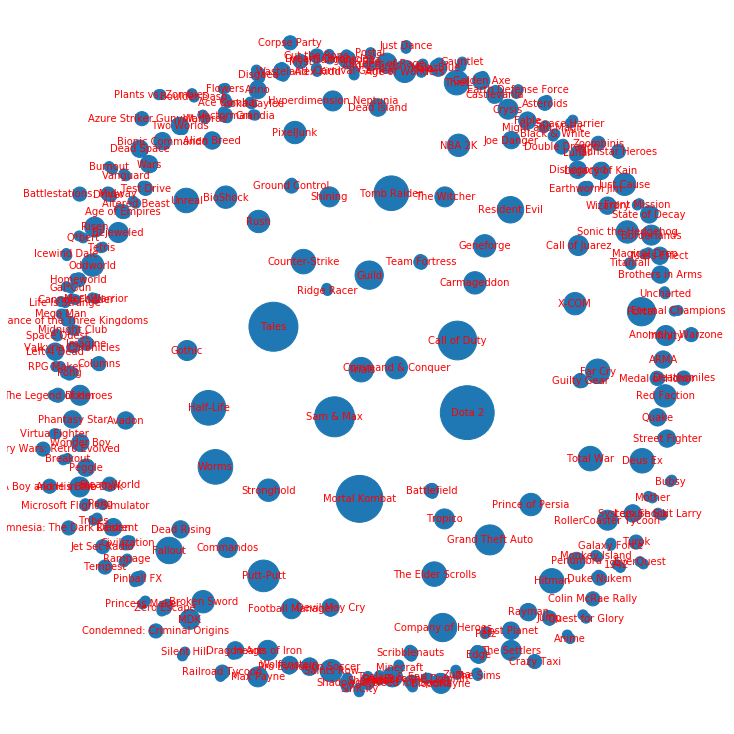

In [69]:
#Make Network of franchises and titles that belong to it
import networkx as nx
graph = nx.Graph()
labels = {}
plt.figure(figsize=(10,10))

for index, row in data.iterrows():
    g = row["ResponseName"]
    for fran in franchises_clean:
        if(len(fran)>=3):
            #if the game is part of a franchise
            if g.startswith(fran):
                #assure that it is a franchise and not part of another word
                if(len(g)>len(fran)):
                    if g[len(fran)].isalpha():
                        continue
                #print("Game "+ g +" belongs to franchise: "+ fran)
                if(graph.has_node(fran)):
                    graph.add_node(g)
                else:
                    graph.add_nodes_from([fran,g])
                    labels[fran] = fran
                graph.add_edge(g,fran)

d = dict(graph.degree)
pos=nx.spring_layout(graph, iterations=100)
#pos= nx.spiral_layout(graph)
nx.draw(graph, pos= pos,  with_labels= False, node_size=[v * 100 for v in d.values()])
nx.draw_networkx_labels( graph, pos, labels= labels, font_size=10,font_color='r')
plt.show()
#plt.savefig('Franchises.png')


In [0]:
#make matrix of game name and franchise it belongs to ----> build network of games linked by franchise---> maybe include other stuf

In [0]:
# make a prediciton model here?

In [70]:
#make Two Dic one for game--> words in game and one for game--> words in description
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

def get_clean_words(inputCol):
    output = {}
    for index, row in data.iterrows():
        game = row["ResponseName"]
        name_data = row[inputCol]
        # split into sentences
        tokens = word_tokenize(name_data)
        # convert to lower case
        tokens = [w.lower() for w in tokens]
        # remove punctuation from each word
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]
        words = [w for w in words if not w in stop_words]
        # stemming of words
        stemmed = [porter.stem(word) for word in words]
        output[game] = stemmed
    return output



game_name_words = get_clean_words("ResponseName")
game_desc_word = get_clean_words("DetailedDescrip")

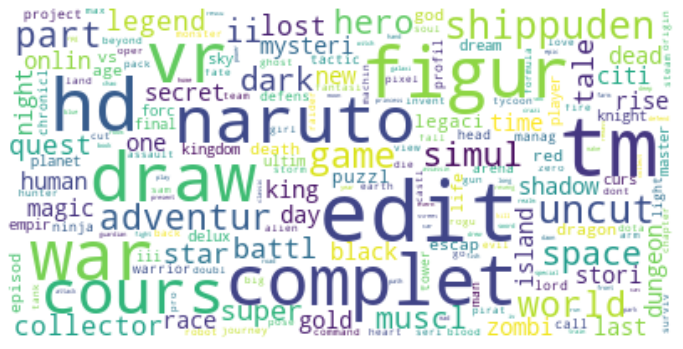

In [71]:
#name word cloud - to better see what is not reflected int he fanchoses
import wordcloud
all_names = [i for v in game_name_words.values() for i in v]

wc = wordcloud.WordCloud(background_color='white', max_font_size=50, collocations= False,).generate(' '.join(all_names))

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

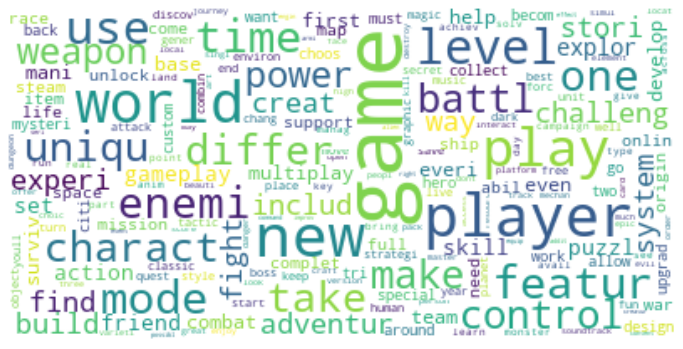

In [72]:
#name word cloud
import wordcloud
all_desc = [i for v in game_desc_word.values() for i in v]

wc = wordcloud.WordCloud(background_color='white', max_font_size=50, collocations= False,).generate(' '.join(all_desc))

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [92]:
# sentiment analysis on name or ddescription ----> metascore? how it effects it
from afinn import Afinn
afinn= Afinn()

game_sentimentscore_metascore = {}

for name in game_name_words.keys():
    row = data.loc[data["ResponseName"] == name]
    metascore = list(row['Metacritic'])[0]
    if metascore == 0:
        continue
    sentiment_score = afinn.score(' '.join(game_name_words[name]))
    game_sentimentscore_metascore[name] = (sentiment_score, metascore)


[(-6.0, 64), (-5.0, 77), (-4.0, 69), (-3.0, 72), (-2.0, 73), (-1.0, 73), (0.0, 72), (1.0, 69), (2.0, 76), (3.0, 76), (4.0, 74), (5.0, 76), (8.0, 78)]


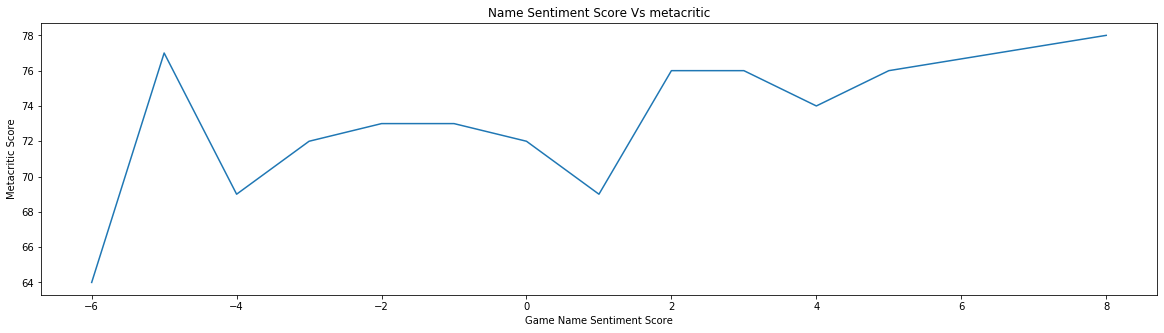

In [103]:
#plot sentiment score vs critic ------ GAME NAME
from statistics import mean 

sentimentscore = [i[0] for i in game_sentimentscore_metascore.values()]
metascore = [i[1] for i in game_sentimentscore_metascore.values()]

#calculate avg metacritic for evey sentiment score
avg_critic_score = {}
for i, s_score in enumerate(sentimentscore):
    if(s_score not in avg_critic_score):
        avg_critic_score[s_score] = []
    avg_critic_score[s_score].append(metascore[i])

for key in avg_critic_score.keys():
    avg_critic_score[key]=  int(round(mean(avg_critic_score[key])))

print(sorted(avg_critic_score.items()))

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

plt.plot( [score[0] for score in sorted(avg_critic_score.items())],   [score[1] for score in sorted(avg_critic_score.items())]   )
plt.title("Name Sentiment Score Vs metacritic")
plt.xlabel("Game Name Sentiment Score")
plt.ylabel("Metacritic Score")
plt.show()

In [104]:
#game description sentiment score vs meta critic
game_disc_sentimentscore_metascore = {}

for name in game_name_words.keys():
    row = data.loc[data["ResponseName"] == name]
    metascore = list(row['Metacritic'])[0]
    if metascore == 0:
        continue
    sentiment_score = afinn.score(' '.join(game_desc_word[name]))
    game_disc_sentimentscore_metascore[name] = (sentiment_score, metascore)


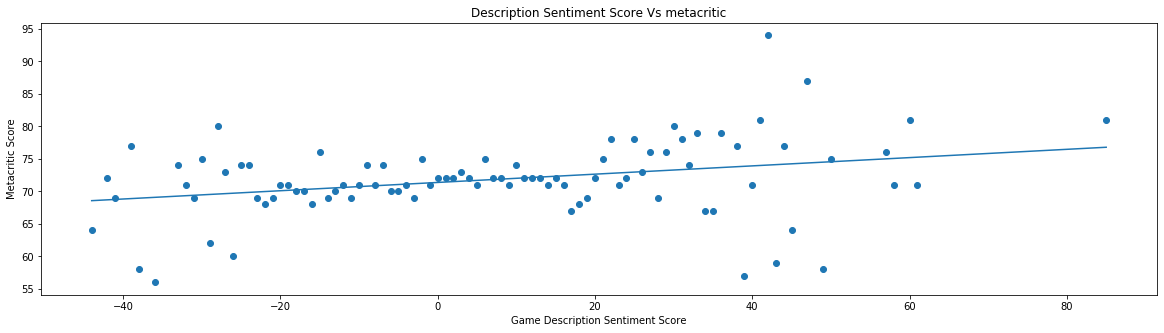

In [110]:
sentimentscore = [i[0] for i in game_disc_sentimentscore_metascore.values()]
metascore = [i[1] for i in game_disc_sentimentscore_metascore.values()]

#calculate avg metacritic for evey sentiment score
avg_critic_score = {}
for i, s_score in enumerate(sentimentscore):
    if(s_score not in avg_critic_score):
        avg_critic_score[s_score] = []
    avg_critic_score[s_score].append(metascore[i])

for key in avg_critic_score.keys():
    avg_critic_score[key]=  int(round(mean(avg_critic_score[key])))

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

x = [score[0] for score in sorted(avg_critic_score.items())]
y =  [score[1] for score in sorted(avg_critic_score.items())]

plt.scatter( x,   y  )
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.title("Description Sentiment Score Vs metacritic")
plt.xlabel("Game Description Sentiment Score")
plt.ylabel("Metacritic Score")
plt.show()

In [ ]:
# distribution of games by genre (for every genre, find the variation of number of games  and number of releases)

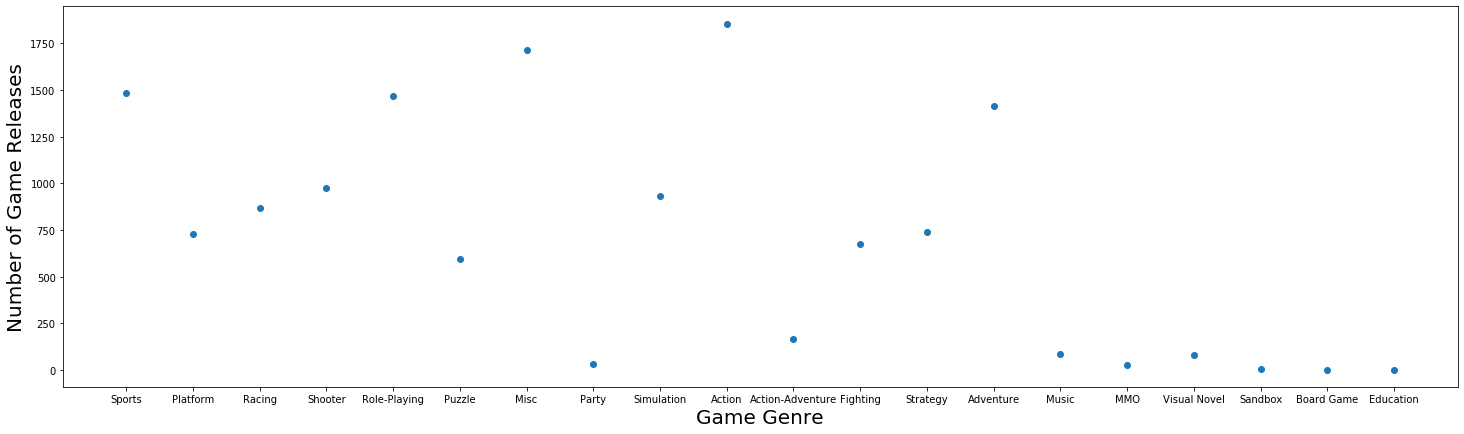

In [31]:
#game dist by genre
genre_dist = {}
for index, row in data.iterrows():
    g = row["Genre"]
    if g not in genre_dist:
        genre_dist[g] = 0
    genre_dist[g] +=1

plt.figure(figsize=(25,7))
plt.scatter(genre_dist.keys(), genre_dist.values())
plt.title("")
plt.xlabel("Game Genre", fontsize=20)
plt.ylabel("Number of Game Releases", fontsize =20)
plt.show()

In [2]:
#build a model that predicts sales based on name, genre, platform and
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

def get_stem_words (name_data):
    # split into sentences
    tokens = word_tokenize(name_data)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    words = [w for w in words if not w in stop_words]
    # stemming of words
    stemmed = [porter.stem(word) for word in words]
    return stemmed

def build_vocab_list(data):
    vocab = []
    for index, row in data.iterrows():
        name_data = row["Name"]
        stemmed = get_stem_words(name_data)
        for elem in stemmed:
            if elem not in vocab:
                vocab.append(elem)
    return sorted(vocab)



#vg sales metacritic
data = pd.read_csv("Data\\vgsales-12-4-2019-short.csv")
#remove duplicates
data = data.drop_duplicates(subset ="Name", 
                     keep = 'first',) 
#keep data that has sales data -- #stop at 19862 index
data = data[data['Rank']<=19862]
#get rid fo wii sport because it is extreme

data = data[data['Rank']>1]
genres = list(np.unique(data.Genre))
platforms = list(np.unique(data.Platform))
vocab = build_vocab_list(data)
#max and min for normalizing output
max_y = 40.24
min_y = 0.01

#print(data)
#print(genres)
#print(platforms)
#make a vocab list

#we have 13840 games left in data set

#make a dic to store the game name and the cleaned w

#might need to build a vocab list of alll wrds and for every name make 1 the words that exists, append genre value, and a platform values

In [18]:
import math
x = np.zeros((len(data), len(vocab)), dtype=int)
y = np.zeros(len(data), dtype=int)

i=0

for index, row in data.iterrows():
    name_data = data.loc[index, "Name"]
    stemmed = get_stem_words(name_data)
    #make the words in the name into 1 value of the input
    for stem in stemmed:
        x[i][vocab.index(stem)] = 1
    #construct output
    if  math.isnan(float(data.loc[index, "Total_Shipped"])):
        out = float(data.loc[index, "Global_Sales"])
    else:
        out = float(data.loc[index, "Total_Shipped"])
    #normalize
    out = (out - min_y)/(max_y - min_y)
    y[i] = int(out *100)
    i += 1


[100, 92, 90, 82, 77, 76, 75, 75, 74, 70]


In [12]:
#try bernoulo
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
model = svm.SVC(gamma=0.001, C=100.)
#model = BernoulliNB()
model.fit(x,y)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
#will need to add an extra place in input (x) for words that are not in vocab
test = x[:50]
prediction = model.predict(test)
accuracy=0
for i, item in enumerate(prediction):
    print("prediction "+ str(item))
    print("real "+ str(y[i]))
    if(item == y[i]):
        accuracy +=1

print(accuracy/len(y) *100)

prediction 1
real 100
prediction 1
real 92
prediction 0
real 90
prediction 0
real 82
prediction 0
real 77
prediction 1
real 76
prediction 0
real 75
prediction 1
real 75
prediction 0
real 74
prediction 0
real 70
prediction 0
real 69
prediction 0
real 59
prediction 0
real 59
prediction 1
real 58
prediction 0
real 57
prediction 0
real 56
prediction 0
real 52
prediction 1
real 51
prediction 0
real 50
prediction 0
real 47
prediction 0
real 46
prediction 1
real 45
prediction 1
real 44
prediction 0
real 43
prediction 0
real 42
prediction 1
real 42
prediction 0
real 40
prediction 0
real 40
prediction 0
real 40
prediction 0
real 40
prediction 0
real 38
prediction 0
real 37
prediction 1
real 37
prediction 0
real 37
prediction 0
real 37
prediction 0
real 36
prediction 0
real 36
prediction 0
real 36
prediction 0
real 36
prediction 0
real 36
prediction 0
real 36
prediction 0
real 35
prediction 0
real 34
prediction 0
real 34
prediction 1
real 34
prediction 0
real 33
prediction 0
real 33
prediction 0

In [22]:
print(prediction[:200])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#Issue alot of zeroes in the input